  
Supplementary code for the MPC Monetary Experiment paper
============

**"Cake-eating algorithm" based simulations**

Here is an interactive Notebook to load and play directly with the Matlab code used in the MPC Monetary Experiment paper (available here), adapted from the Bogomolnaia and Moulin cake eating algorithm paper (2001). Please allow Binder to be loaded (<1 min), then you can look at the code, change parameters and run cell by cell as in any Jupyter Notebook (Maj+Enter).  

**The models and graphs presented here aim at highlight how international trade produces**
- naturally one "safest" reserve currency, not necessarily linked to trade volume or surplus
- this tendency of a trade "winner takes all" is inherent to any groups of trading countries
- how good or bad the winner of a trade group will be does not depend only on the size of the trade group - the worse-off countries of a big trading group can be worse than countries' in smaller trade groups
- initial conditions are important in the short-medium term, but not for the long run ; Triffin events do exists here, but are gradual in this model (and in practice)

Based on this model we make the argument that **trade winner countries should have some monetary redistribution and stabilization schemes, and that unique and unstable monetary anchors are not the only possible solutions to the Mundell's redundancy problem.** We hence derive an example of such monetary redistribution and stabilization scheme in our paper.

The other simulations used in the paper can be also found here *(for simulation of the monetary system, 1945-now)*, here *(for different debt sustainability scenarii after Covid-19)*, and here *(for "cake-eating algorithm" based simulations with our redistribution and stabilization scheme).*

Note that here all commands are interpreted by Octave instead of Matlab as the code is originally intended to. There are only two differences - the digraph function to plot the trade preference among countries graph, and the sprandsym (random initialization of the trade preference graph) function which is slightly more elaborate in Matlab. Both original Matlab codes and Octave code for these two points are explicit here (cell and cell), with more details if you want to copy paste the code and run in Matlab insteaed of here. 

*Help on commands is available using the `%help` magic or using `?` with a command.*

Please feel free to reach back to nxyzhang@mit.edu, and to play/expand the model at will !


Examples of figures from paper that can be obtained with this notebook : 

**First a 6 countries in 3 trade groups, 7 rounds simulation (just 7 rounds are enough to see trends !)**

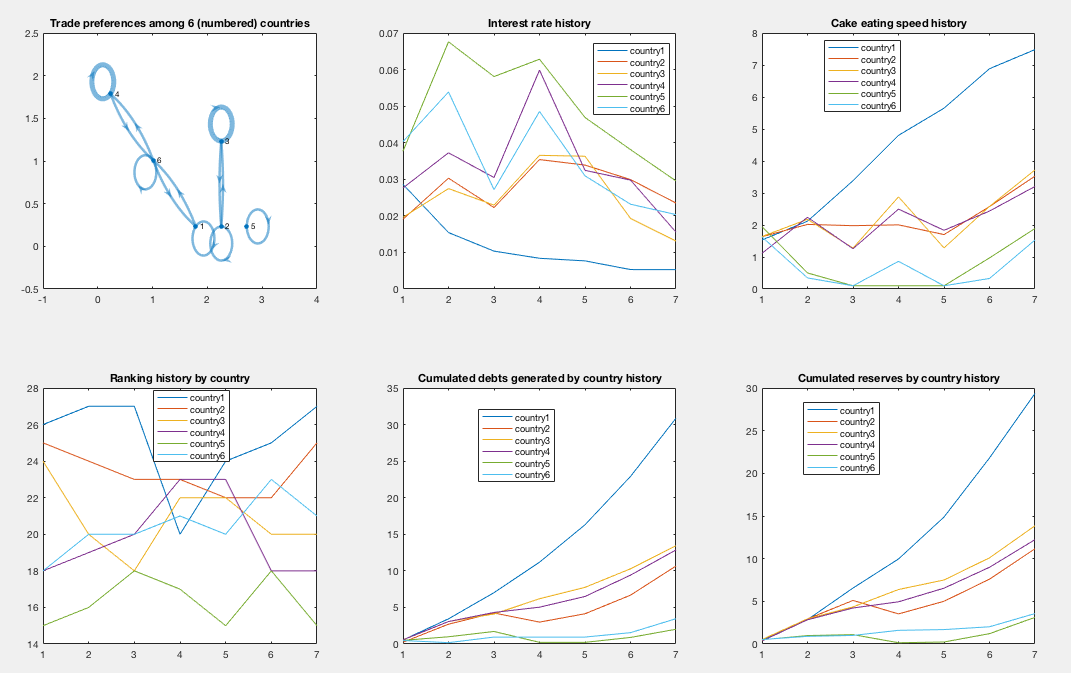

From this first short simulation note that :

- the size of cakes, eating speed etc... tend to powers law i.e. one country (here country 1) gains much more than any more in that trading group (mathematical proof in paper). Intuition is that as it is perceived "safer" by other countries (because it devalues less) the "cakes" (debts) it generates are always eaten first by other countries, and thus incentivizes (through lower interest rate) country 1 to generate bigger cake, invest more in its cake eating speed, invest more in other countries' debts as well, etc.

- the country that would gain the most is determined by initial conditions (in this very easy example everything is initialized at random, but looking at the initial ranking - the higher the score the most sought after a ranking is - and the initial interest rate we can tell us that country 1 will be winning !)

- the country that would gain the most in a short run trade group is not necessarily the one determined by fundamentals - i.e. not the most connected one or the most prudent one *(in the trade group between country 1, 4 and 6 country 1 is neither the most connected - since country 6 has more connections than it does - nor the most self preserving - since country 4 ranks its own debts to others' higher first)*


**A second 6 countries in 3 trade groups, 7 rounds simulation**

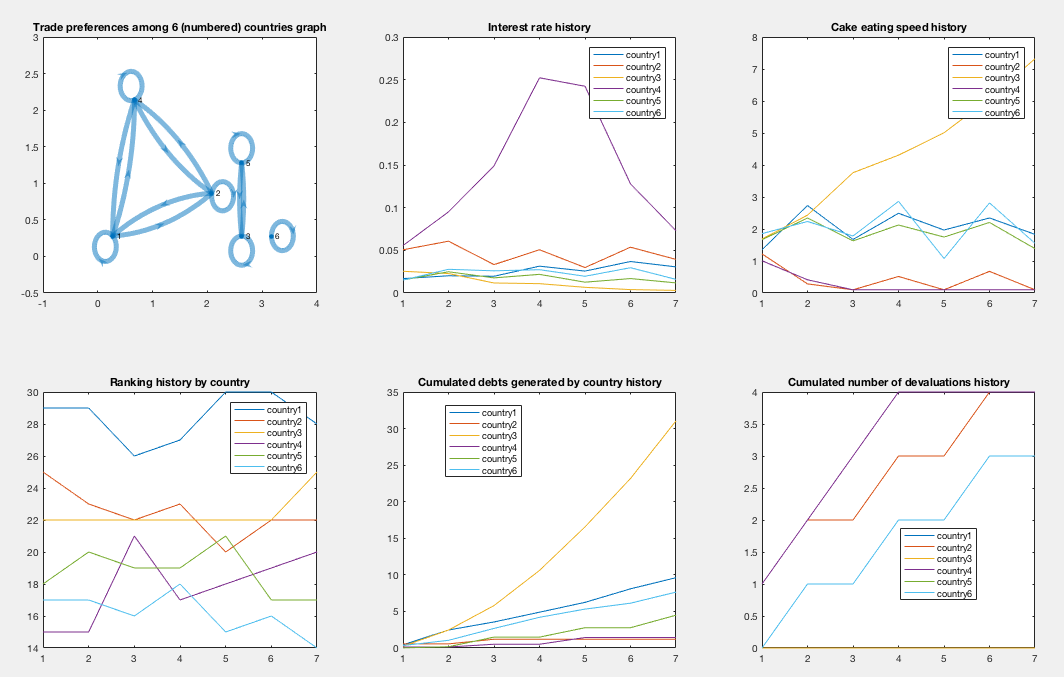

- Here the winner is country 3 - which is less connected (only to country 5) than the cluster with countries 1, 2 and 4

- The worse off country in the group (1, 2 and 4) is doing even worse than country 6 in autarky (extreme case of the model, because country 4 started (randomly) at the least preferred country in country rankings, and failed to get its cakes eaten at the end of round 1, thus devalues round 2, its interest rate surge, and it gets stuck in a devaluation sprial from round 1 to 4.

- Note that here country 1 had better initial conditions to be the be winner of the simulations (best ranked country at the start, lowest interest rate at the start). But its trading partners - country 2 and 4, are the ones devaluing the most 

**Finally a 9 countries, 1000 rounds simulation**

The figures below illustrate the long rung trends in this model :

- Reduction of average global rates can happen (see rounds 120 to 220 on both the cumulated. This is when the total eating speed is faster than the timer, hence the reduced number of devaluations rounds 120 to 220 

- Triffin events exist : the yellow country (country 3) started as the winner of this simulation, until around round 220 at which point it is overtaken by country 1 in deep blue and don't stop devaluing until the end of the 1000 rounds. This corresponds to fundamental analysis (country 3 is only trading with 2 countries whereas country 1 with 4. But countries 6 and 9 for instance are both connected to 4 trading partners, with stronger ties among some of them and with themselves. These two countries are respectly the 2nd and 3rd most sought after countries, both in rankings, in upward trends in rankings, and in how much of their cakes are absorbed by others as reserve).

*Note that these long term analysis will be nuanced by a more calibrated simulation in the notebooks on 1945-now and after Covid-19, available here and here, in which the cake eating speed and cake generation speed are governed by more complicated but more realistic 

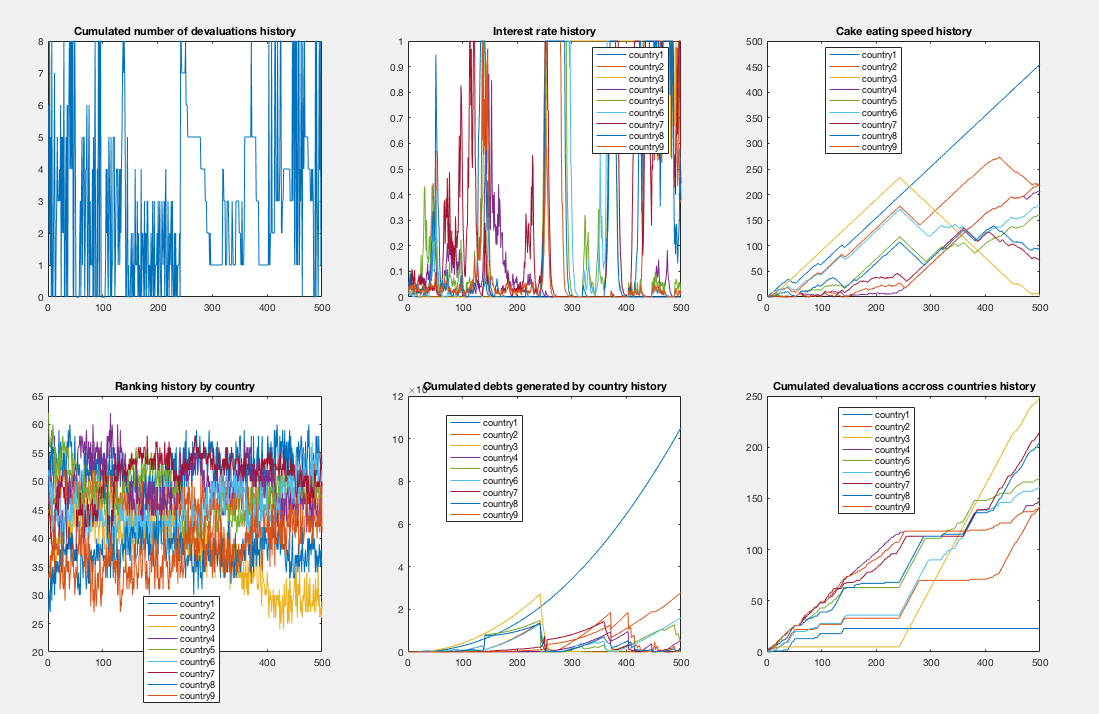

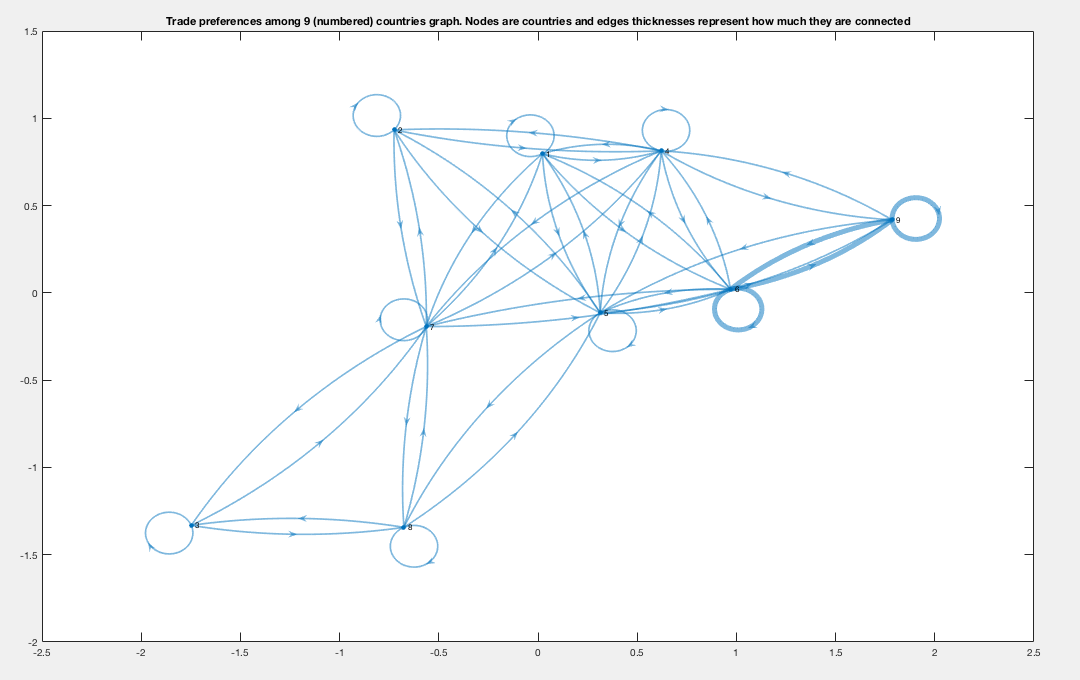


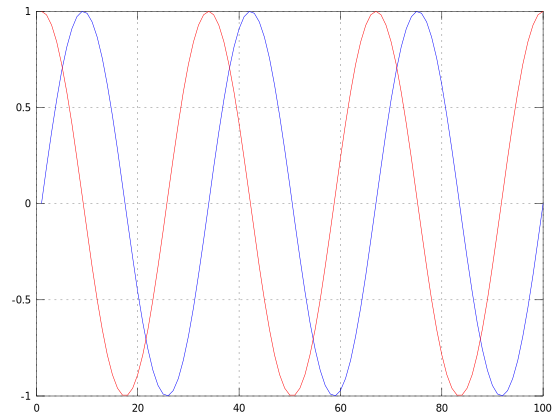

In [1]:
# Exogeneous parameters of the simulation to be played with 

number_of_countries = 9 %total number of countries in the simulation
number_of_rounds = 1000 %total number of "cake eating rounds" 

interest_rate = (0.03).*ones(number_of_countries,1); %initial interest rates - more below on how interest rates change according to
interest_rate_history = zeros(number_of_countries,number_of_rounds);

uni=0.7;%uni is used in the random generation of the trade preference matrix - a number_of_countries x number_of_countries matrix in which the number line i, column j indicates how interconnected the economies of countries i and j are. This random generation is done with the function R = sprandsym(n,density) - in our case n=number_of_countries and density = uni, which returns a symmetric random, n-by-n, sparse matrix with approximately density*n*n nonzeros; each entry is the sum of one or more normally distributed random samples, and (0 <= density <= 1) .For calibration uni=0.3 creates with good probability if there are 6 countries in total 3 trade coalitions, one with 3 countries, one with 2, and 1 in autarky.

%If we were in Matlab we would have added the parameter rc=0.02, still for this sprandsym function, which denotes how inequal trade between countries can be (the smaller the more). Indeed,  R = sprandsym(n,density,rc) returns a matrix with a reciprocal condition number equal to rc. The distribution of entries is nonuniform; it is roughly symmetric about 0; all are in [−1,1]. If rc is a vector of length n, then R has eigenvalues rc. Thus, if rc is a positive (nonnegative) vector then R is a positive (nonnegative) definite matrix. In either case, R is generated by random Jacobi rotations applied to a diagonal matrix with the given eigenvalues or condition number. 


Bogomolnaia and Moulin's cake eating algorithm (2001) 
============

Time is discrete, in rounds. 
During each round each country generates one "cake" (debt), and simultaneously eats each others' cakes at different speed and following different rankings (so when a piece of cake is finished the countries that were eating eat move to the item below in their rankings). Each country stores what he ate in his reserves - the endowments. More below on how rankings and cakes are generated by each country at each round, and on how endowments change according to countries' behaviours).

Note that this model has good properties for **fair treatments of equals** and related axiomatic treatment (which is what Bogomolnaia and Moulin's main intent was in their 2001 paper). We adapted it to bring it closer to a macro setting, and concretely implemented and calibrated it.

*Additional factors to keep in mind in the code below :*

How trade preferences are initialized matter - can be played with extensively.
How "cakes" (debts) generation and cake eating speed evolve matter (several different options, discussed between this notebook and the 1945-now calibrated simulation notebook

In [ ]:
# We initialize here the recording vectors that will collect the history of the simulation, to plot the graphs at the end of this notebook

endowments_reserves_history = zeros(number_of_countries,number_of_rounds); %The records of how much cakes in total each country has accumulated at each round (see cell just below for the definition of a cake)
endowments_debts_history = zeros(number_of_countries,number_of_rounds); %The records of how much cakes (ie debts) in total each country has generated up to round t (see cell just below for the definition of a cake)
abso_speed_history = zeros(number_of_countries,number_of_rounds); 
devaluation_history = zeros(number_of_countries,number_of_rounds); %The records of the cumulated number of times which each country devalued up to round i
ranking_history = zeros(number_of_countries,number_of_countries); %The records of the order in which each country ranked other countries' cake to be eaten at each round(see cell just below for the definition of a cake)
abso_history = zeros(1,number_of_rounds); %The records of the eating speed of each country for each round (see cell just below for the definition of the eating speed)
sum_cakes_history = zeros(1,number_of_rounds); %The records of each country's cake size for each round (see cell just below for the definition of a cake)
duration_T_updated_history = zeros(1,number_of_rounds); %The records of how long was the timer for each round (see cell just below for the definition of a timer)

In [ ]:
# We initialize here the intermediary parameters that will be used within each round

endowments = zeros(number_of_countries,number_of_countries); % Where countries store what "cakes" (debts) they ate during each round. At the end of each round a country's cake that hasn't been totally eaten will decrease the parts of all reserves that contained pieces of cakes (from all previous rounds, not just this round) from that country (it's a devaluation - and we record it in deval_history = deval_history + 1). Else if the cake has been totally it counts as a success and we record it in history_counter = history_counter + 1 
abso_speed = 100.*rand([number_of_countries,1]); % The eating speed of the countries - here initialized at random. During the rest of the game these speed will evolve depending on the history_counters and devaluation_counters of each country
abso_speed_init = abso_speed;

initial_pos = 100.*rand([number_of_countries,1]); % Cakes generated by each country, initialized at random. Then at the start of each round the size of cakes being generated by each country are function of how safe this country is (history_counter - deval_history) plus a random number different for each country (see further in the code)
initial_pos_init =initial_pos;
initial_pos_round = initial_pos;
cakes_from_previous_round = initial_pos; 

duration_T = 1; % There's a timer for each rouund. A round ends when this timer ends, or when countries ate all the cakes if faster than the timer (the timer changes at each round depending on the total cake sizes and total eating speed ratio, so that it increases rather steadily)
fraction_ranking = (1/3); % Used for calibration
duration_T_updated = duration_T;

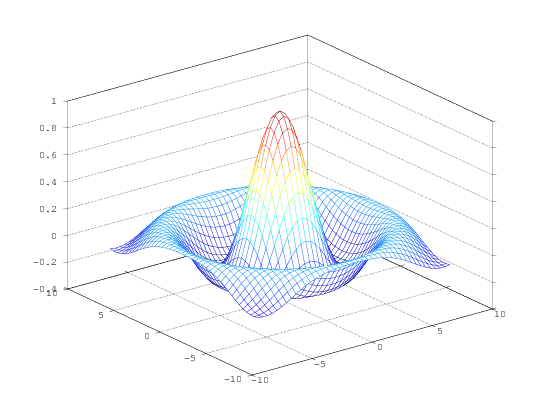

In [10]:
%plot --format png
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);

In [3]:
a = [1,2,3]

a =

   1   2   3



In [4]:
b = a + 3;

In [5]:
disp(b)

   4   5   6


The width or the height can be specified to constrain the image while maintaining the original aspect ratio.

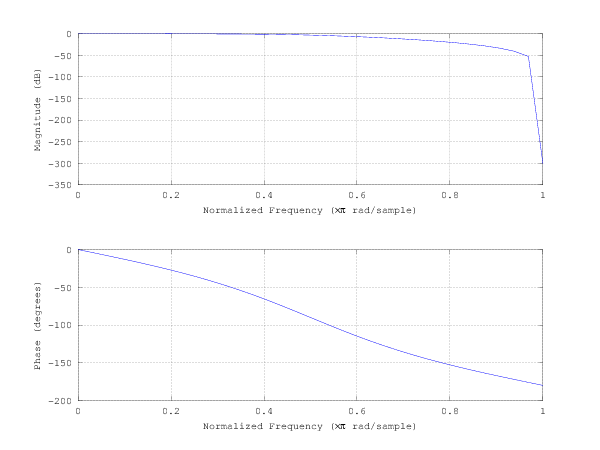

In [7]:
%plot -f png -w 600

% butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

Multiple figures can be drawn.  Note that when using imshow the image will be created as a PNG with the raw
image dimensions unless the image has a title or labels.

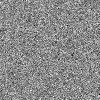

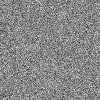

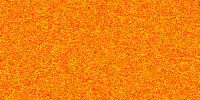

In [24]:
% small image
imshow(randn(100,100))

% let's change the data range
figure
imshow(randn(100,100), [-10 10])

% let's try automatic range and different size
figure
imshow(randn(100,200), [])
colormap('autumn')

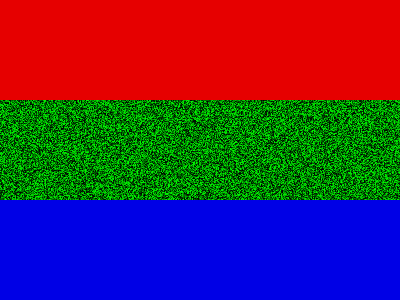

In [3]:
% Create an RGB image with no title or labels
close all hidden
image = zeros(300,400,3);
image(1:100,:,1) = 0.9;  % Red
image(101:200,:,2) = rand(100,400);  % Green
image(201:300,:,3) = 0.9;  % Blue
imshow(image)

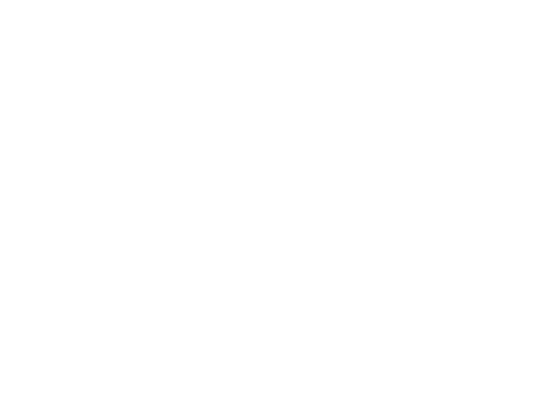

In [15]:
% image that is too small to display raw (<100 pixels)
imshow(rand(50,50))

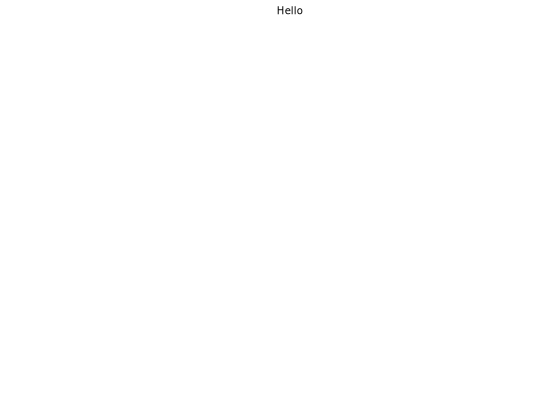

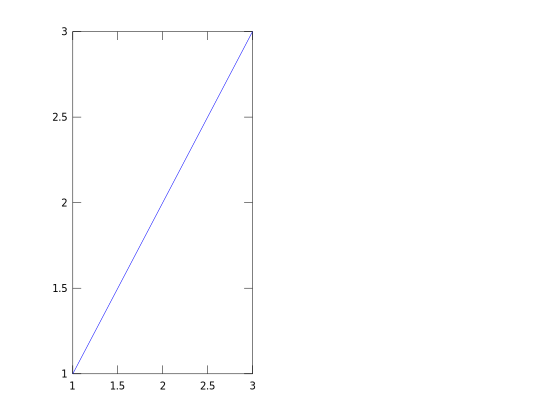

In [48]:
% let's add a title - this produces full figure
imshow(rand(100,100))
title('Hello')

% let's create an image next to a plot
figure
subplot(121)
plot([1,2,3])
subplot(122)
imshow(randn(100,100))

In [3]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor
